Body brain weights outliers
---

Exercise: Load an plot the data
---

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

In [1]:
import pandas as pd
import os

# Load data set
data_df = pd.read_csv(os.path.join('data', 'bodybrain-weights.csv'))

# Display first five rows
data_df.head()

,body,brain,label
0,36330.0,119.5,Grey wolf
1,3000.0,25.0,Echidna
2,27660.0,115.0,Goat
3,9400000.0,70.0,Triceratops
4,3600.0,21.0,Rock hyrax-b


In [2]:
import numpy as np

# Create x/y Numpy arrays
x = data_df.body.values
y = data_df.brain.values

# Apply logarithmic scale
x_log = np.log(x)
y_log = np.log(y)

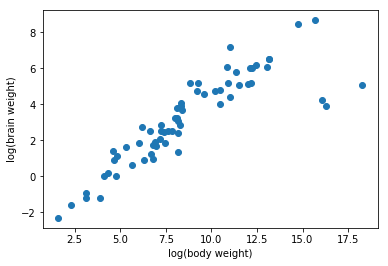

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the x and y variables
plt.scatter(x_log, y_log)
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)')
plt.show()

Exercise: Filter outliers and fit a linear regression
---

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

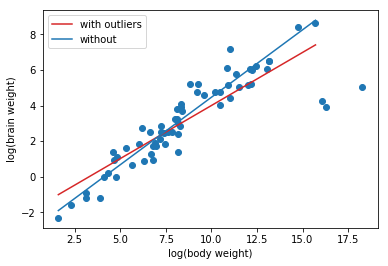

In [4]:
# (A) Fit a linear regression using all the data points
coefs_lr1 = np.polyfit(x_log, y_log, deg=1)

# (B) Filter the three outliers
idx = ((x_log > 15) & (y_log < 6))
x2_log, y2_log = x_log[~idx], y_log[~idx]

# (C) Fit a linear regression using the rest of the data points
coefs_lr2 = np.polyfit(x2_log, y2_log, deg=1)

# (D) Compare the two models
x_values = np.linspace(min(x2_log), max(x2_log), num=100)
y_values_lr1 = np.polyval(coefs_lr1, x_values)
y_values_lr2 = np.polyval(coefs_lr2, x_values)

plt.scatter(x_log, y_log)
plt.plot(x_values, y_values_lr1, c='C3', label='with outliers')
plt.plot(x_values, y_values_lr2, label='without')
plt.legend()
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)')
plt.show()

Exercise: Fit a linear regression using Huber loss
---

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

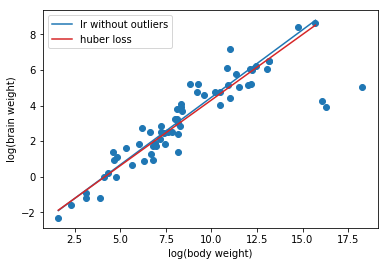

In [5]:
from sklearn.linear_model import HuberRegressor

# Create object
lr_huber = HuberRegressor(epsilon=1.1)

# Fit it
lr_huber.fit(x_log[:, np.newaxis], y_log)

# Compute predictions
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])

# Plot the prediction line
plt.scatter(x_log, y_log)
plt.plot(x_values, y_values_lr2, label='lr without outliers')
plt.plot(x_values, y_values_huber, c='C3', label='huber loss')
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)')
plt.legend()
plt.show()

Exercise: Comptue the *Encephalization Quotient (EQ)*
---

We saw that the equation of a simple linear regression for variables on a logarithmic scale: $\log\left(y\right)=a\log\left(x\right)+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weights. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [6]:
# (A) Create a and c values
a, b = coefs_lr2
c = np.exp(b)
print('brain = {:.3f}*body^{:.3f}'.format(c, a))

# (B) Compute predicted brain weights
y_pred = c*x**(a)

# (C) Compute EQ
data_df['EQ'] = y/y_pred

# (D) Print the five largest quotients
data_df.sort_values(by='EQ', ascending=False).head()

brain = 0.044*body^0.758


,body,brain,label,EQ
48,62000.0,1320.0,Human,6.960230
57,6800.0,179.0,Rhesus monkey,5.044836
26,10550.0,179.5,Baboon,3.625807
22,480.0,15.5,Owl monkey,3.261447
21,101.0,4.0,Ground squirrel,2.744688


Alternative solution
---

In [7]:
# (A) Extract coefficients
a, b = coefs_lr2
print('log(brain) = {:.3f}*log(body) + ({:.3f})'.format(a, b))

# (B) Compute predicted brain weights
y_pred_log = a*np.log(x) + b
y_pred = np.exp(y_pred_log)

# (C) Compute EQ
data_df['EQ'] = y/y_pred

# (D) Print the five largest quotients
data_df.sort_values(by='EQ', ascending=False).head()

log(brain) = 0.758*log(body) + (-3.123)


,body,brain,label,EQ
48,62000.0,1320.0,Human,6.960230
57,6800.0,179.0,Rhesus monkey,5.044836
26,10550.0,179.5,Baboon,3.625807
22,480.0,15.5,Owl monkey,3.261447
21,101.0,4.0,Ground squirrel,2.744688
